In [37]:
import os
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from glob import glob
PATH = str(Path(os.getcwd()).parent)
sys.path.append(PATH)

from Algorithm.img_preprocess import total_function, cvt_binary

In [38]:
img_path = "/hdd/woonho/autonomous_driving/rfdata/0115/"
direction = 0
img_list = glob(img_path + "f_bird--a{}*.png".format(direction))

img_idx = 100
img = cv2.imread(img_list[img_idx])
preprocess_img = total_function(img)
binary_img = cvt_binary(img)



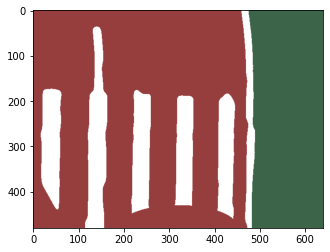

In [39]:
plt.imshow(preprocess_img)